## Presentation of distributed data collection - Where are the birds?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Datei einlesen
file_path = "only_calls.csv"
df = pd.read_csv(file_path)

# Die ersten Zeilen anzeigen, um die Struktur zu verstehen
df.head()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

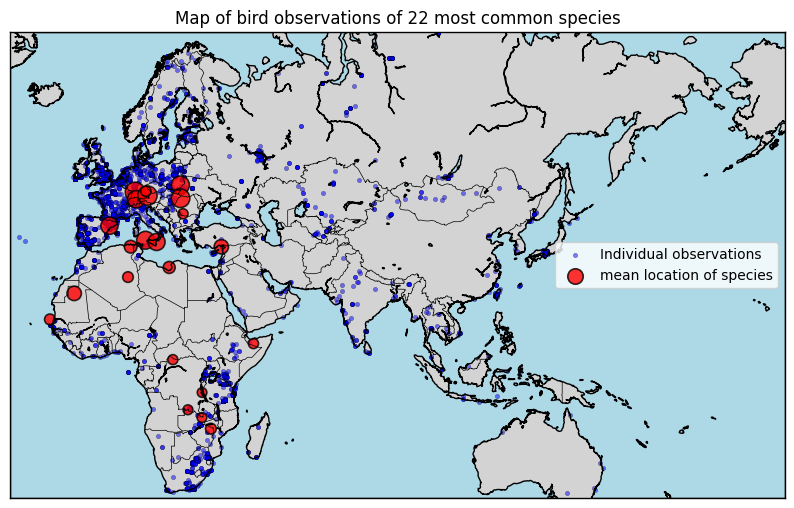

In [16]:

# Die 22 häufigsten 'common_name' Werte ermitteln
top_common_names = df["common_name"].value_counts().head(22).index

# Daten filtern nach den Top 22 häufigsten common_names
filtered_df = df[df["common_name"].isin(top_common_names)]

# Gruppieren nach 'common_name' und den Mittelpunkt der Koordinaten berechnen sowie die Häufigkeit zählen
grouped_df = filtered_df.groupby("common_name").agg(
    latitude=("latitude", "mean"),
    longitude=("longitude", "mean"),
    count=("common_name", "count")
).reset_index()

# Alle Datenpunkte für die 22 häufigsten Arten verwenden
filtered_lats = filtered_df["latitude"].values
filtered_lons = filtered_df["longitude"].values

# Neue Karte mit allen Datenpunkten erstellen
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', 
            llcrnrlat=-36, urcrnrlat=72, 
            llcrnrlon=-30, urcrnrlon=210, 
            resolution='l', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Koordinaten umwandeln
x_all, y_all = m(filtered_lons, filtered_lats)

# Streudiagramm mit besser sichtbaren Markierungen
ax.scatter(x_all, y_all, s=10, c='blue', alpha=0.5, edgecolors="black", linewidth=0.3, label="Individual observations")

# Zentroiden der häufigsten Arten erneut einzeichnen
x_centroid, y_centroid = m(grouped_df["longitude"].values, grouped_df["latitude"].values)
bubble_sizes = grouped_df["count"] / grouped_df["count"].max() * 200  # Größere Blasen
ax.scatter(x_centroid, y_centroid, s=bubble_sizes, c='red', alpha=0.8, edgecolors="black", linewidth=1.2, label="mean location of species")

# Titel und Legende
plt.title("Map of bird observations of 22 most common species")
plt.legend()

# Anzeigen der Karte
plt.show()


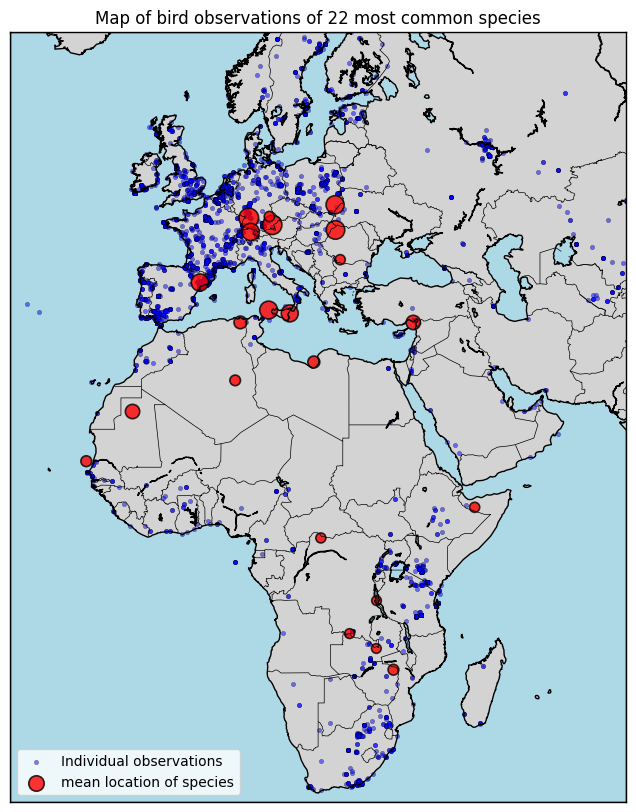

In [17]:

# Die 22 häufigsten 'common_name' Werte ermitteln
top_common_names = df["common_name"].value_counts().head(22).index

# Daten filtern nach den Top 22 häufigsten common_names
filtered_df = df[df["common_name"].isin(top_common_names)]

# Gruppieren nach 'common_name' und den Mittelpunkt der Koordinaten berechnen sowie die Häufigkeit zählen
grouped_df = filtered_df.groupby("common_name").agg(
    latitude=("latitude", "mean"),
    longitude=("longitude", "mean"),
    count=("common_name", "count")
).reset_index()

# Alle Datenpunkte für die 22 häufigsten Arten verwenden
filtered_lats = filtered_df["latitude"].values
filtered_lons = filtered_df["longitude"].values

# Neue Karte mit allen Datenpunkten erstellen
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(projection='merc', 
            llcrnrlat=-36, urcrnrlat=65, 
            llcrnrlon=-30, urcrnrlon=70, 
            resolution='l', ax=ax)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Koordinaten umwandeln
x_all, y_all = m(filtered_lons, filtered_lats)

# Streudiagramm mit besser sichtbaren Markierungen
ax.scatter(x_all, y_all, s=10, c='blue', alpha=0.5, edgecolors="black", linewidth=0.3, label="Individual observations")

# Zentroiden der häufigsten Arten erneut einzeichnen
x_centroid, y_centroid = m(grouped_df["longitude"].values, grouped_df["latitude"].values)
bubble_sizes = grouped_df["count"] / grouped_df["count"].max() * 200  # Größere Blasen
ax.scatter(x_centroid, y_centroid, s=bubble_sizes, c='red', alpha=0.8, edgecolors="black", linewidth=1.2, label="mean location of species")

# Titel und Legende
plt.title("Map of bird observations of 22 most common species")
plt.legend()

# Anzeigen der Karte
plt.show()


               Species  Count
        Common Buzzard    425
      Common Sandpiper    412
        Wood Sandpiper    381
Western Yellow Wagtail    362
    European Bee-eater    350
   Common House-Martin    328
          Barn Swallow    323
          Little Egret    318
            Black Kite    227
           Great Egret    227
    Red-rumped Swallow    178
       Eurasian Hoopoe    158
          Cattle Egret    129
 Black-backed Puffback    128
        Egyptian Goose    124
        Willow Warbler    116
       Great Cormorant    113
       Pied Kingfisher    112
         Common Bulbul    110
           Hadada Ibis    106
      Collared Sunbird    103
  Tawny-flanked Prinia    102
    Rattling Cisticola     89


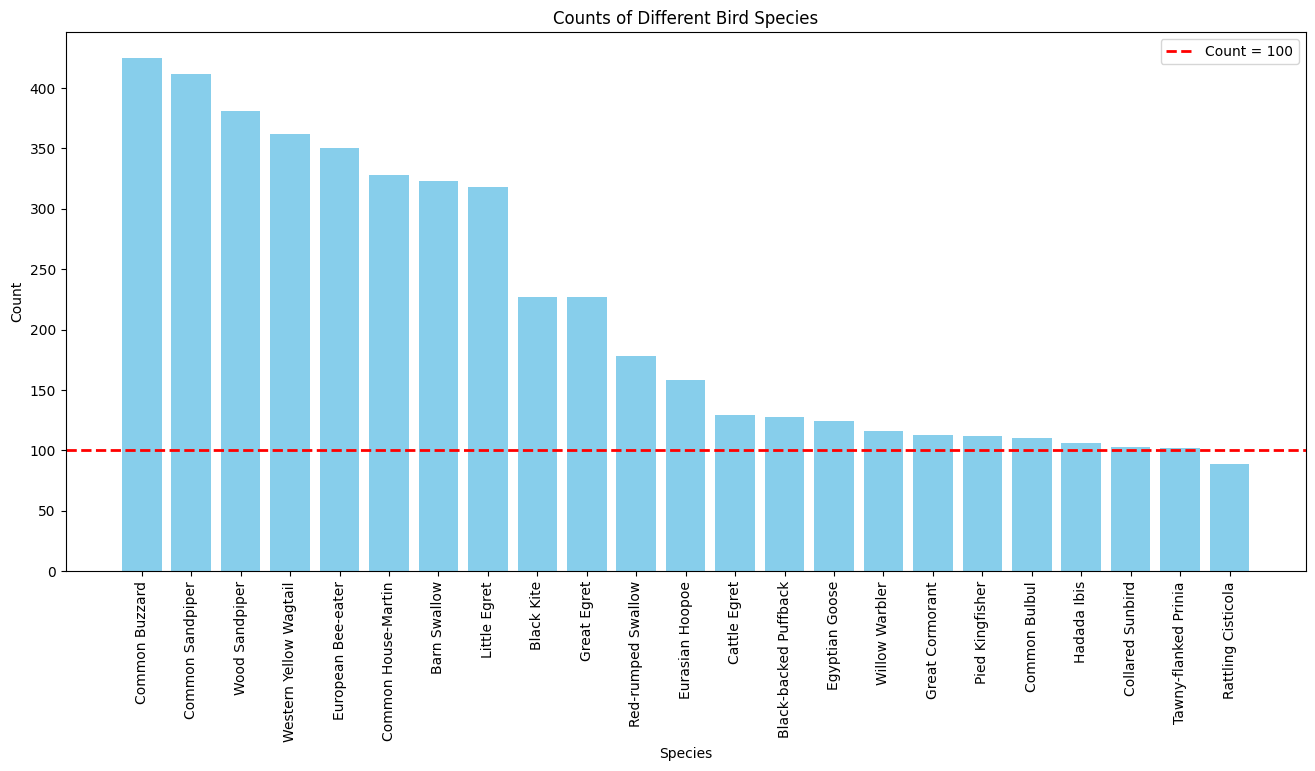

In [33]:
import pandas as pd

data = {
    "Species": [
        "Common Buzzard", "Common Sandpiper", "Wood Sandpiper", "Western Yellow Wagtail",
        "European Bee-eater", "Common House-Martin", "Barn Swallow", "Little Egret",
        "Black Kite", "Great Egret", "Red-rumped Swallow", "Eurasian Hoopoe",
        "Cattle Egret", "Black-backed Puffback", "Egyptian Goose", "Willow Warbler",
        "Great Cormorant", "Pied Kingfisher", "Common Bulbul", "Hadada Ibis",
        "Collared Sunbird", "Tawny-flanked Prinia", "Rattling Cisticola"
    ],
    "Count": [
        425, 412, 381, 362, 350, 328, 323, 318, 227, 227, 178, 158, 129, 128, 124,
        116, 113, 112, 110, 106, 103, 102, 89
    ]
}

df = pd.DataFrame(data)
print(df.to_string(index=False))
# Create a bar plot for the counts of birds
plt.figure(figsize=(16, 7))
plt.bar(df["Species"], df["Count"], color='skyblue')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Counts of Different Bird Species')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.axhline(y=100, color='red', linestyle='--', linewidth=2, label='Count = 100')
plt.legend()
plt.show()
# Add a red line at the 100 count


AttributeError: 'DataFrame' object has no attribute 'crs'

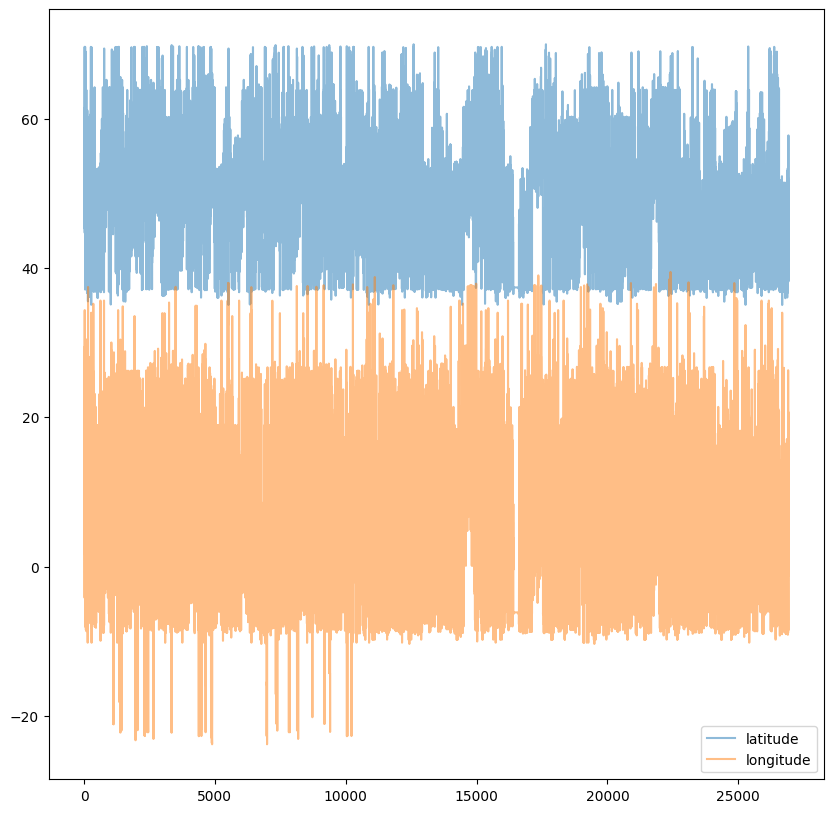

In [10]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt

# Beispiel GeoDataFrame (ersetze dies durch dein eigenes DataFrame)
european_birds = gpd.read_file("../data/european_birds.csv")

# Konvertiere latitude und longitude zu numerischen Werten
european_birds['latitude'] = pd.to_numeric(european_birds['latitude'], errors='coerce')
european_birds['longitude'] = pd.to_numeric(european_birds['longitude'], errors='coerce')

# Entferne Zeilen mit fehlenden Werten
european_birds = european_birds.dropna(subset=['latitude', 'longitude'])

# Erstelle die Karte
ax = european_birds.plot(figsize=(10, 10), alpha=0.5, )

# Füge eine Basemap hinzu, aber diesmal mit einem anderen Anbieter
ctx.add_basemap(ax, crs=european_birds.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Karte anzeigen
plt.show()


In [11]:
import matplotlib.pyplot as plt

# Plotte die Geodaten
gdf.plot()

# Optional: füge einen Titel und Achsenbeschriftungen hinzu
plt.title("Karte der Punkte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Zeige die Karte an
plt.show()


NameError: name 'gdf' is not defined

In [6]:
european_birds.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,date,filename,license,rating,time,geometry
0,amtspa,[],['call'],55.6237,13.2427,Spizelloides arborea,American Tree Sparrow,2016-11-12,XC342444.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.0,14:00,POINT (13.2427 55.6237)
1,amtspa,[],['call'],55.6237,13.2427,Spizelloides arborea,American Tree Sparrow,2016-11-16,XC342952.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,08:31,POINT (13.2427 55.6237)
2,amtspa,[],['call'],55.6237,13.2427,Spizelloides arborea,American Tree Sparrow,2016-11-16,XC342954.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,10:28,POINT (13.2427 55.6237)
3,banswa,[],['call'],54.5592,11.9695,Riparia riparia,Bank Swallow,2013-06-08,XC138517.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,05:18,POINT (11.9695 54.5592)
4,banswa,[],"['alarm call', 'call']",46.1374,5.9609,Riparia riparia,Bank Swallow,2013-07-13,XC142649.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,09:00,POINT (5.9609 46.1374)


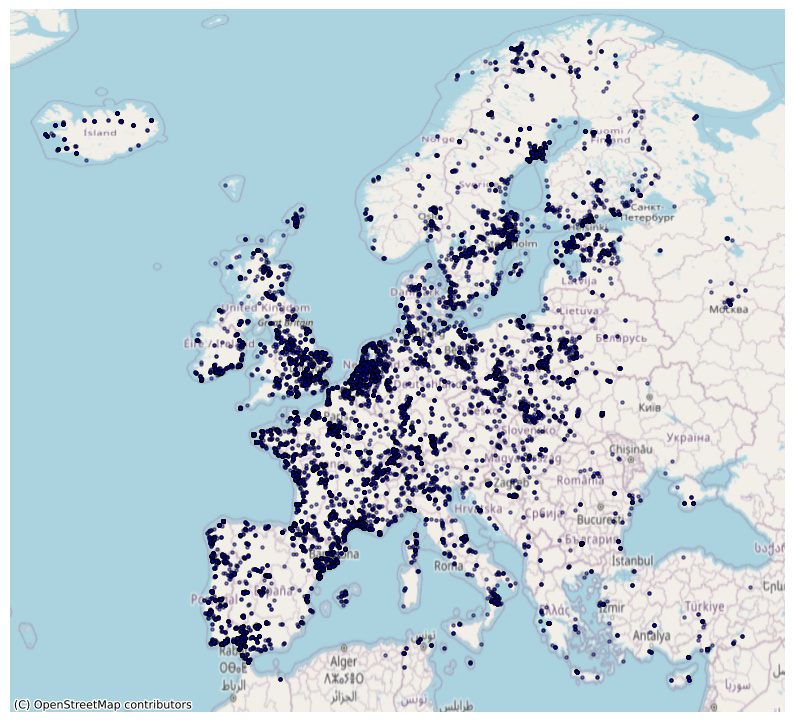

In [18]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Datei laden
df = pd.read_csv('../data/european_birds.csv')

# Prüfen, ob die Spalten 'long' und 'lat' vorhanden sind
if 'longitude' not in df.columns or 'latitude' not in df.columns:
    raise ValueError("Die CSV-Datei muss die Spalten 'long' und 'lat' enthalten!")

# GeoDataFrame erstellen
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")  # WGS84-Koordinatensystem

# Karte erstellen
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.5, edgecolor='k')

# Basemap hinzufügen
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Achsen ausblenden
ax.set_axis_off()

# Karte anzeigen
plt.show()
